In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print("Survival counts:\n", df['Survived'].value_counts())
print("\nSex counts:\n", df['Sex'].value_counts())
print("\nPclass counts:\n", df['Pclass'].value_counts())
print("\nEmbarked counts:\n", df['Embarked'].value_counts())

Survival counts:
 Survived
0    549
1    342
Name: count, dtype: int64

Sex counts:
 Sex
male      577
female    314
Name: count, dtype: int64

Pclass counts:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked counts:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


### Handling Missing Values
- Filled 177 missing `Age` values with median (28).
- Filled 2 missing `Embarked` values with mode ('S').
- Dropped `Cabin` column due to 687 missing values (77% of data).
- No missing values remain.

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True) 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 
df.drop('Cabin', axis=1, inplace=True) 
print("Missing values after handling:\n"), df.isnull().sum()

Missing values after handling:



(None,
 PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

### Visualization: Histogram for Age Distribution
To understand the distribution of passenger ages.

C:\Users\ranga\OneDrive\Documents\rangapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


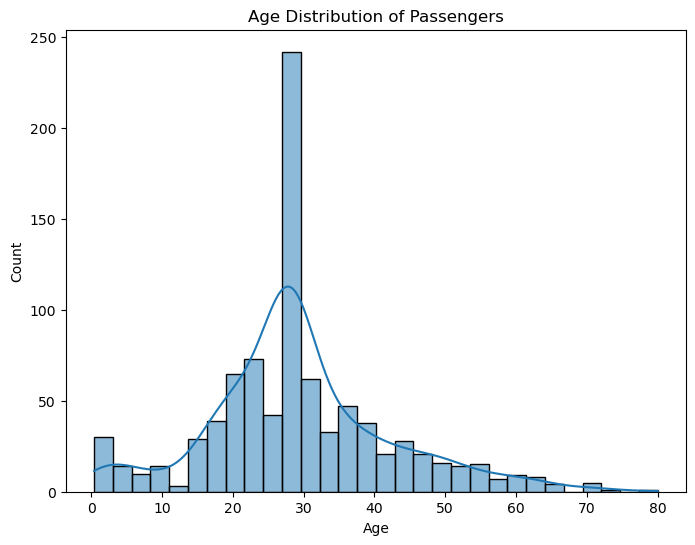

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Observation: Age Histogram
- Most passengers are between 20-40 years old, with a peak around 28 (median).
- The distribution is slightly right-skewed, with fewer older passengers (e.g., >60).

### Visualization: Histogram for Fare Distribution
To explore the distribution of ticket fares.

C:\Users\ranga\OneDrive\Documents\rangapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


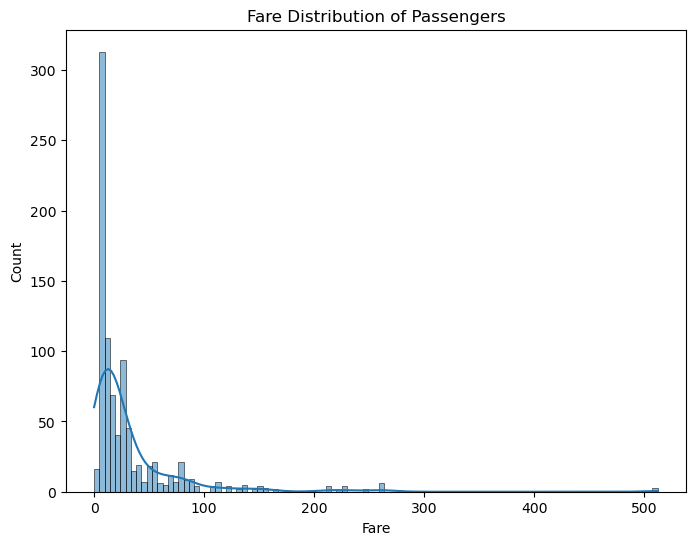

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

### Observation: Fare Histogram
- Fares are highly right-skewed, with most below 50 but outliers above 500.
- A few passengers paid zero fare, possibly crew or errors.

### Visualization: Boxplot of Age by Passenger Class
To compare age distributions across ticket classes.

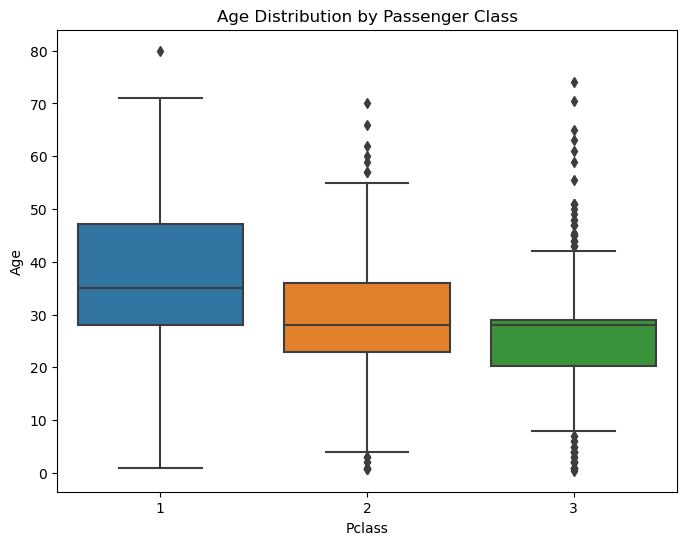

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

### Observation: Age by Pclass Boxplot
- 1st class passengers are older (median ~37) than 2nd (~29) and 3rd (~25).
- 3rd class has more younger passengers and outliers (e.g., infants).

### Visualization: Boxplot of Fare by Survival
To compare fares between survivors and non-survivors.

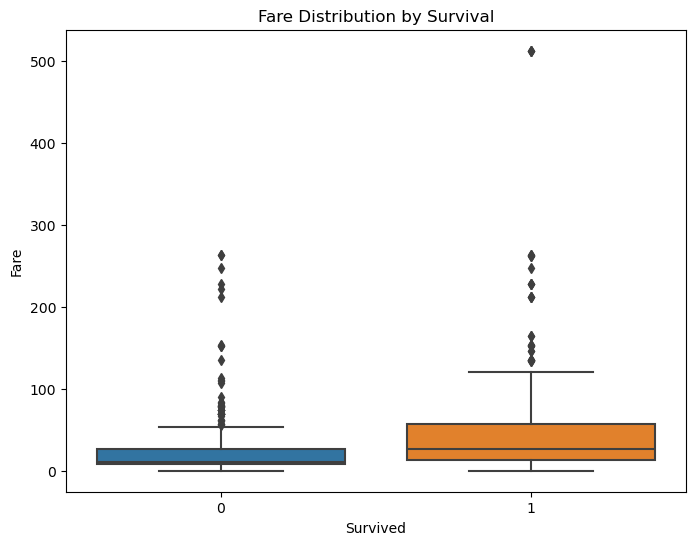

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

### Observation: Fare by Survival Boxplot
- Survivors paid higher fares (median ~26 vs ~10 for non-survivors).
- Many outliers in both groups, with some survivors paying very high fares (>500).

### Visualization: Scatterplot of Age vs Fare by Survival
To explore relationships between age, fare, and survival.

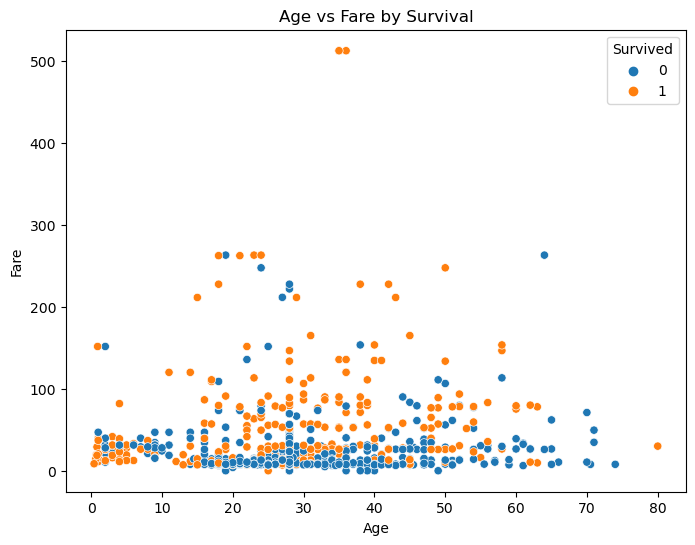

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare by Survival')
plt.show()

### Observation: Age vs Fare Scatterplot
- Higher fares are associated with better survival, especially for passengers aged 20-40.
- No clear age-survival pattern, but high-fare outliers (e.g., >300) often survived.

### Visualization: Pairplot of Numerical Features
To explore relationships between numerical variables and survival.

C:\Users\ranga\OneDrive\Documents\rangapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ranga\OneDrive\Documents\rangapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ranga\OneDrive\Documents\rangapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ranga\OneDrive\Documents\rangapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

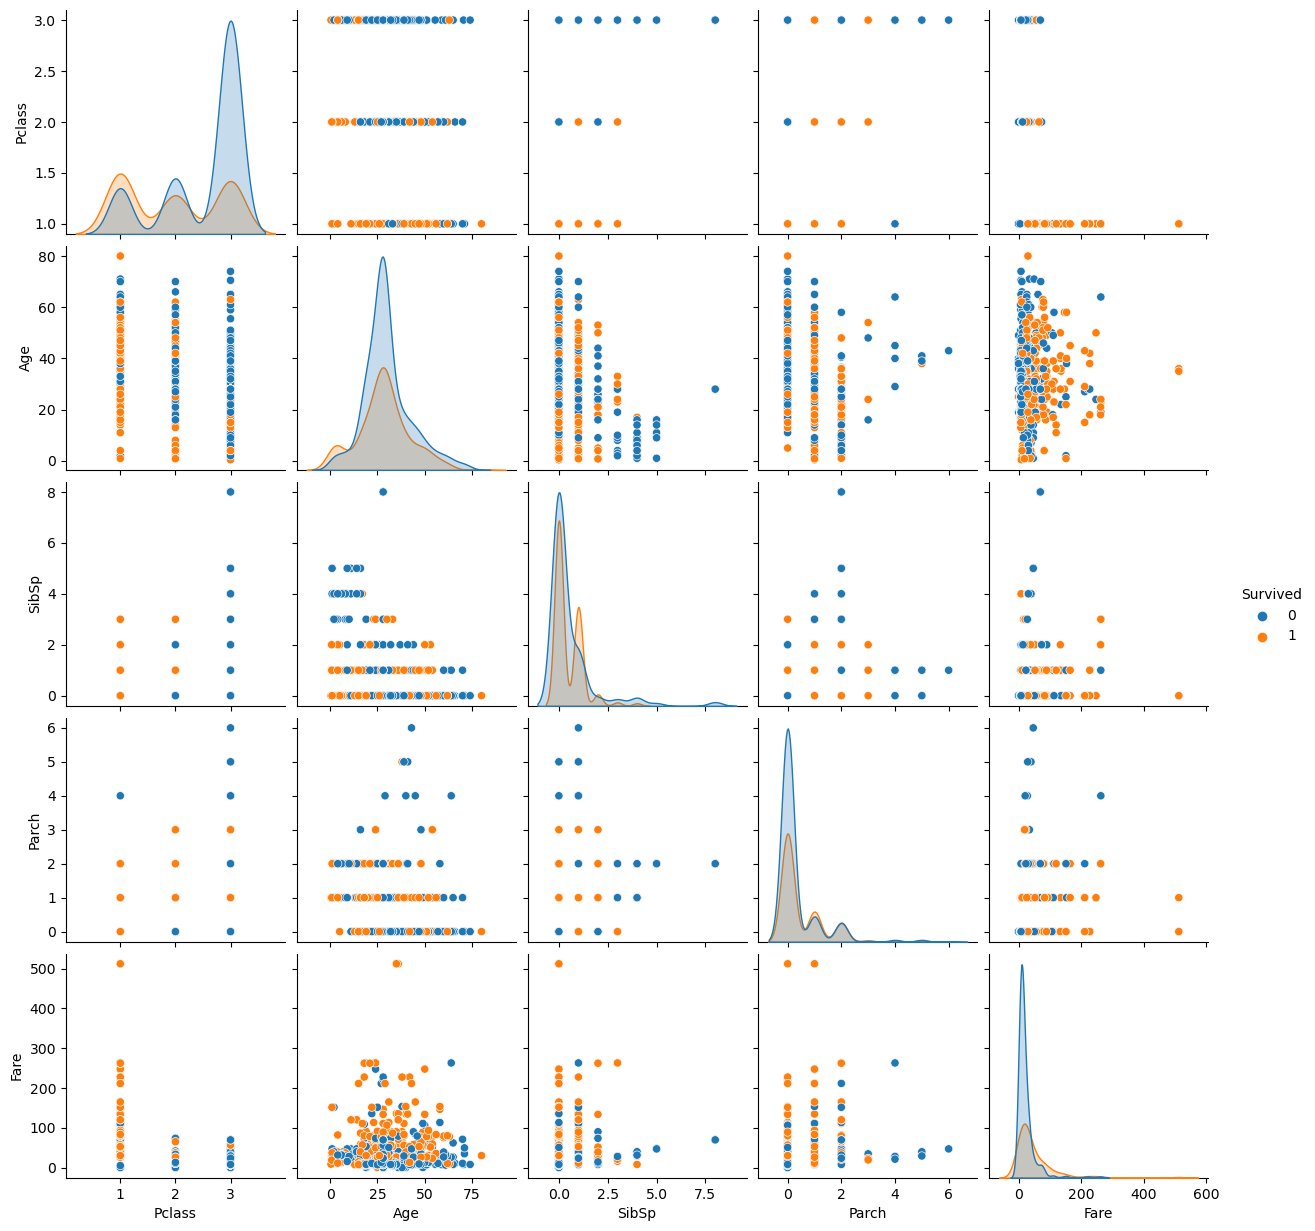

In [14]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')
plt.show()

### Observation: Pairplot
- Clear separation in `Pclass` (1st class more likely to survive) and `Fare` (higher fares linked to survival).
- `SibSp` and `Parch` show no strong linear patterns with survival.
- Some overlap in `Age`, but younger passengers in 1st class tend to survive.

### Visualization: Correlation Heatmap
To identify correlations between numerical variables.

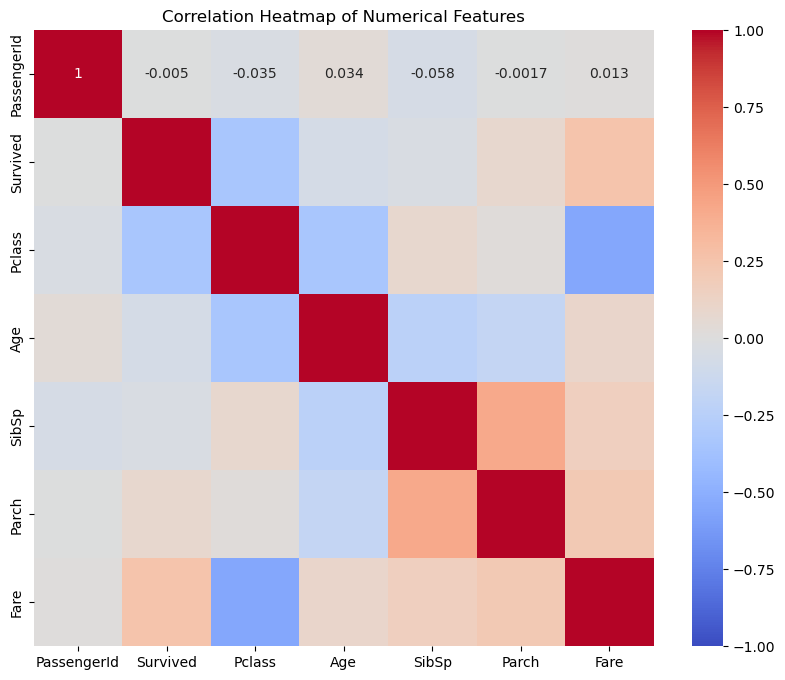

In [15]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr = numerical_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Observation: Correlation Heatmap
- Strong negative correlation between `Pclass` and `Fare` (-0.55): higher class (lower `Pclass` number) = higher fare.
- Positive correlation between `Survived` and `Fare` (0.26): higher fares linked to survival.
- Weak correlations between `Age` and other variables, suggesting age alone isn’t a strong predictor.

### Visualization: Barplot of Survival by Sex
To compare survival rates between males and females.

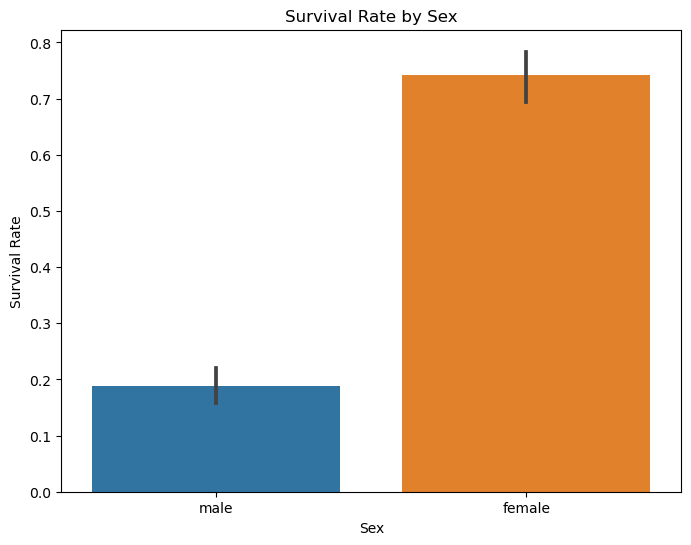

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

### Observation: Survival by Sex Barplot
- Females have a much higher survival rate (~74%) than males (~19%).
- Gender is a strong predictor of survival, likely due to "women and children first" protocols.

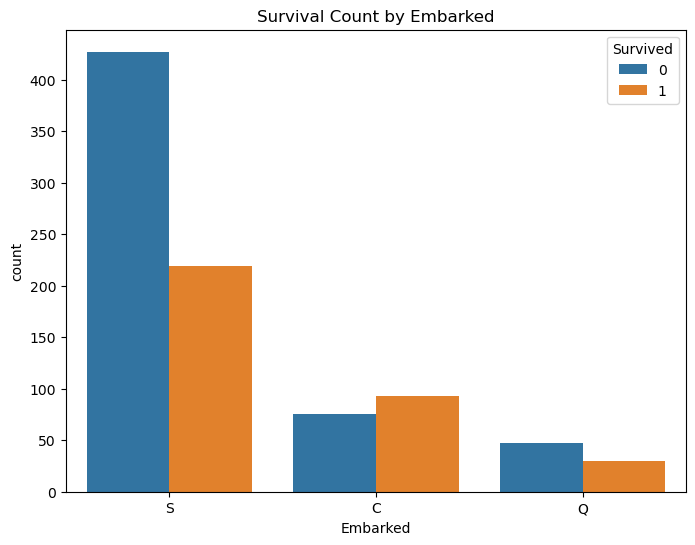

In [18]:
df['Survived'] = df['Survived'].astype(str)

plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked')
plt.show()

### Observation: Survival by Embarked Countplot
- Passengers from Cherbourg (C) have a higher survival count relative to their total number compared to Southampton (S) and Queenstown (Q).
- Southampton (S) has the most passengers (644, from earlier `.value_counts()`), but a lower proportion survived.
- Queenstown (Q) has the fewest passengers (77) and a low survival rate.
- This suggests embarkation port may relate to survival, possibly due to differences in passenger class or demographics at each port..

In [29]:
df['Survived'] = df['Survived'].astype(float)

print("Survival rate by Sex:\n", df.groupby('Sex')['Survived'].mean())
print("\nSurvival rate by Pclass:\n", df.groupby('Pclass')['Survived'].mean())

Survival rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Key Insights and Patterns
- **Gender**: Females had a significantly higher survival rate (74.8%) than males (18.9%), likely due to "women and children first" evacuation protocols.
- **Class**: 1st class passengers had the highest survival rate (63.0%), followed by 2nd (47.3%) and 3rd (24.2%), reflecting socioeconomic disparities.
- **Fare**: Higher fares correlate with survival (correlation: 0.26), closely tied to passenger class.
- **Age**: Most passengers were 20-40 years old; 1st class passengers were older on average (median ~37). Age has a weak correlation with survival.
- **Embarkation**: Cherbourg passengers had better survival rates, possibly due to more 1st class passengers boarding there.
- **Anomalies**: Zero fares (possible crew or errors) and extreme fares (>500) were identified. `Cabin` was dropped due to 77% missing data.
- **Family Size**: `SibSp` and `Parch` show no strong linear correlation with survival, but large families exist (max `SibSp`=8, `Parch`=6).

## Summary
The Titanic dataset reveals that gender, passenger class, and fare were key determinants of survival. Females, 1st class passengers, and those paying higher fares had significantly better survival odds. Age had a weaker influence, with most passengers being young adults. Missing data in `Age` and `Embarked` was handled via imputation, and `Cabin` was dropped due to excessive missing values. Anomalies like zero fares and extreme outliers were noted. This EDA highlights clear socioeconomic and demographic patterns, providing a foundation for predictive modeling.